# Modeling People’s Voting Behavior with Poll Information
# Implementation part

In this project we developed a system that is given a behavior model, its according parameters and plots the predicted vote of the chosen voter by the specific behavior model based on the range of the parameters given.
In this way we can measure the different effects caused by the range of parameters.
We will test the following models:
* AU
* AT
* LD
* KP
* LD

in this project we will also use additional py files to assist with processing.
* Voters.py - Class of a voter, each voter has attributes of ID, preferences, utilities, poll info, and functions for each model.
* Data.py - this file implements the models given in the article, using it will return the output of the votes based on the chosen model. (in case of a tie it will return a tie as we think it would be best to see that there is a tie and understanding the reason for it instead of breaking it in some manner).
* Plots.py - this file will assist with ploting the final outcome based on configurations given (more on the plots will be described further on).



In [1]:
import pandas
from voters import Voter
import plots

In [2]:
def create_voters(path):
    """
    Creates the voter objects based on the excel file given.
    :param path: (str) path to the excel file
    :return: voters objects list
    """
    excel_file = pandas.read_excel(path, skiprows=1)
    voters = []
    candidates = {}
    for index, row in excel_file.iterrows():
        candidates = {1: row['CanName1'],
                      2: row['CanName2'],
                      3: row['CanName3']}
        vote = candidates[row['NewVote']]
        preference_list = [candidates[row['Pref1']],
                           candidates[row['Pref2']],
                           candidates[row['Pref3']]]
        utilities_dict = {preference_list[0]: row['Util1'],
                          preference_list[1]: row['Util2'],
                          preference_list[2]: row['Util3']}
        id = row.VoterID
        s = {candidates[1]: row['VotesCand1'],
             candidates[2]: row['VotesCand2'],
             candidates[3]: row['VotesCand3']}
        voter = Voter(id=id,
                      preference_list=preference_list,
                      utilities_dict=utilities_dict,
                      vote=vote,
                      s=s)
        voters.append(voter)
    return voters, candidates

In [3]:
class Config:
    """
    This class will hold the arguments given interactively by the user and use them as configurations.
    """
    def __init__(self, 
                 file_name=None, #Experiment file name
                 model_name=None, #Prediction model
                 k=None, #The size of the winners group, can be 1/2/3 for KP model
                 division_param=None, #Division parameter
                 l_bound=None, #Lower bound for the parameter
                 u_bound=None, #Upper bound for the parameter
                 division_param_b=None, #Division parameter for b parameter in AU
                 division_param_a=None, #Division parameter for a parameter in AU
                 l_bound_a=None, #Lower bound for the a parameter for AU model
                 u_bound_a=None, #Upper bound for the a parameter for AU model
                 l_bound_b=None, #Lower bound for the b parameter for AU model
                 u_bound_b=None, #Upper bound for the b parameter for AU model
                 e=None, #Epsilon of AU model
                 voter_id=None, #Voter ID we want to check the models parameter for
                 voters_start_index=0, #start index of line in data sheat
                 voters_end_index=9999999999):
        
        self.file_name= file_name
        self.model_name= model_name
        self.k=k
        self.division_param=division_param
        self.l_bound= l_bound
        self.u_bound= u_bound
        self.division_param_a=division_param_a
        self.division_param_b=division_param_b
        self.l_bound_a=l_bound_a
        self.u_bound_a=u_bound_a
        self.l_bound_b=l_bound_b
        self.u_bound_b=u_bound_b
        self.e=e
        self.voter_id= voter_id
        self.voters_start_index= voters_start_index
        self.voters_end_index= voters_end_index

Config is the function to pass arguments to the script, (as would be in command line --flag/knob)

For each Test please specify needed arguments as described in the previous block.

The following will be a number of tests to show each model, Please activate one test (change parameters as desired) and continue to plot block.

### Test 1 - AT Model

arguments to pass:
- file_name OneShot-FullData_2204.xlsx 
- model_name AT 
- l_bound 1 
- u_bound 10 
- division_param 3
- voter_id=' P7FMfW' (note that in this specific file there is space before the id)

In [4]:
args = Config(file_name= 'OneShot-FullData_2204.xlsx',
              model_name= 'AT' ,
              l_bound= 1 ,
              u_bound= 2 ,
              division_param= 3,
              voter_id=' P7FMfW')

### Test 2 - LD Model

arguments to pass:
- file_name OneShot-FullData_2204.xlsx 
- model_name LD 
- l_bound 1 
- u_bound 10 
- division_param 3
- voter_id=' P7FMfW' (note that in this specific file there is space before the id)

In [16]:
args = Config(file_name= 'OneShot-FullData_2204.xlsx',
              model_name= 'LD' ,
              l_bound= 1 ,
              u_bound= 10 ,
              voter_id=' P7FMfW')

### Test 3 - KP Model

arguments to pass:
- file_name OneShot-FullData_2204.xlsx 
- model_name KP 
- k 3
- voters_start_index=0
- voters_end_index=3

In [21]:
args = Config(file_name= 'OneShot-FullData_2204.xlsx',
              model_name= 'KP' ,
              k= 3,
              voters_start_index=0,
              voters_end_index=3)

### Test 4 - CV Model

arguments to pass:
- file_name OneShot-FullData_2204.xlsx 
- model_name CV 
- l_bound= 1
- u_bound= 2 
- division_param= 3,
- voters_start_index=2
- voters_end_index=10

In [33]:
args = Config(file_name= 'OneShot-FullData_2204.xlsx',
              model_name= 'CV' ,
              l_bound= 1 ,
              u_bound= 3 ,
              division_param= 3,
              voters_start_index=2,
              voters_end_index=10)

### Test 5 - AU Model

arguments to pass:
- file_name OneShot-FullData_2204.xlsx 
- model_name AU 
- l_bound_a= 0
- u_bound_a= 2
- l_bound_b= 0
- u_bound_b= 1
- division_param_b= 3
- division_param_a= 3
- e= 0.5
- voters_start_index=0
- voters_end_index=1

In [31]:
args = Config(file_name= 'OneShot-FullData_2204.xlsx',
              model_name= 'AU' ,
              l_bound_a= 0,
              u_bound_a= 2,
              l_bound_b= 0,
              u_bound_b= 1,
              division_param_b= 3,
              division_param_a= 3,
              e= 0.5,
              voters_start_index=0,
              voters_end_index=1)

## Plot Results

In each plot we can see:
Type of model, Voter ID and Poll information.
x-axis: relevant parameter values, above each parameter the vote based on the model (in candidate defined color).
In each graph we will show up to 3 parameter values, color for each candidate and tie will be green.
The legend will hold further info including which candidates are in a tie and for what parameter value.
Note that the outcome can produce a large amount of plots as the range of voters can be vast.

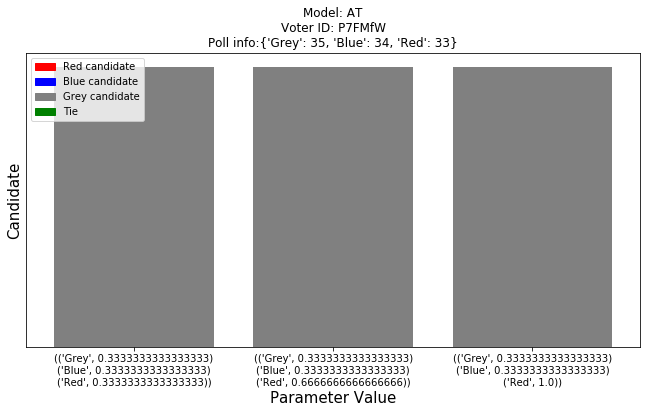

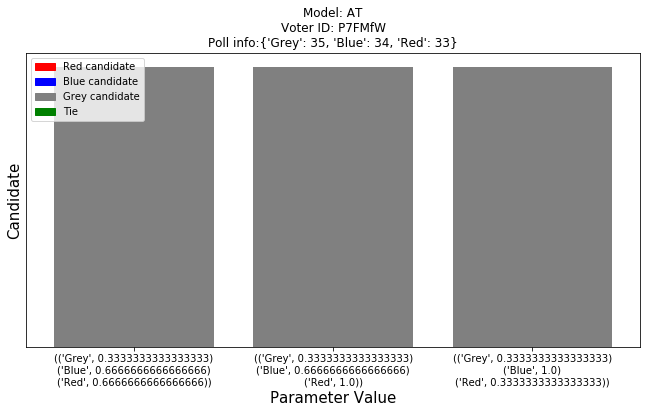

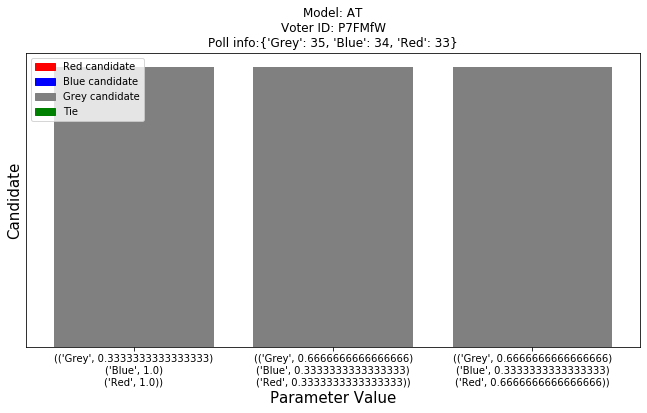

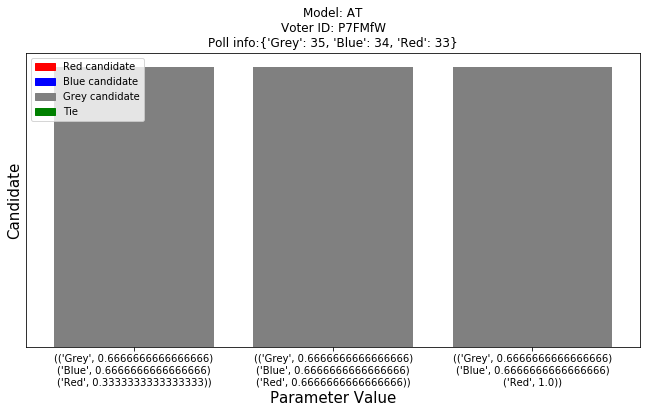

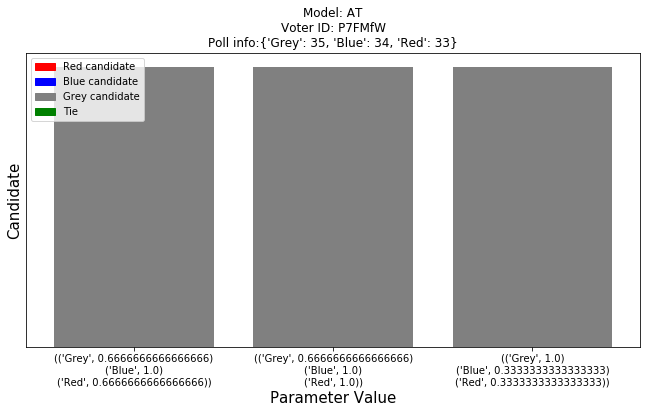

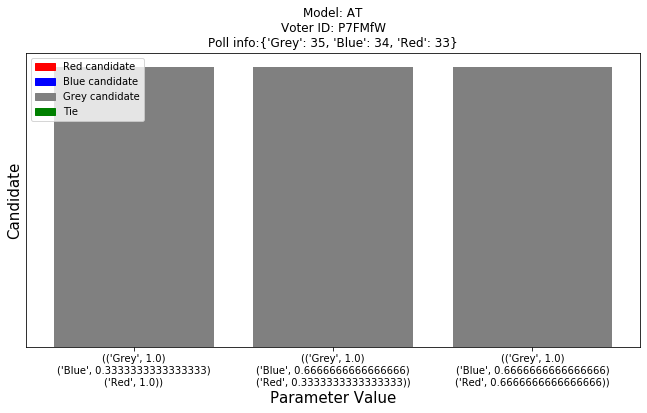

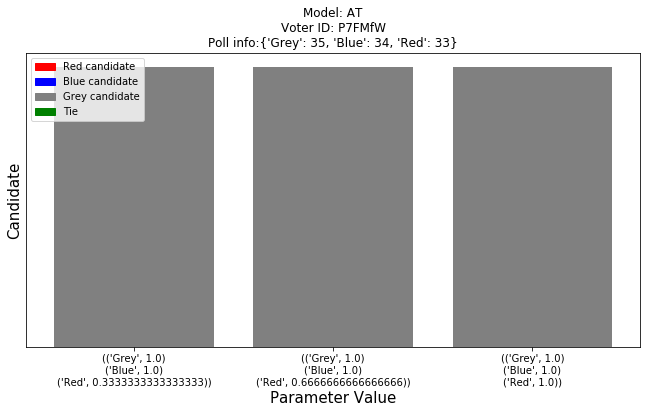

In [5]:
voters, candidates = create_voters(args.file_name)
model = args.model_name
result = []
checked_voters = []
if args.voter_id:
    for voter in voters:
        if voter.id == args.voter_id:
            checked_voters.append(voter)
else:
    checked_voters = voters[args.voters_start_index: args.voters_end_index]

if model == 'KP':
    if not args.k:
        raise RuntimeError('For KP calculation you must enter k parameter')
    for voter in checked_voters:
        result,s = voter.get_KP_parameter(args.k)
        plots.create_plot(result, voter, 'KP',s)

elif model == 'CV':
    if not args.division_param or not args.l_bound or not args.u_bound:
        raise RuntimeError('For CV calculation you must enter division_param, l_bound and u_bound parameters')
    if args.l_bound > args.u_bound:
        raise RuntimeError('Lower bound is bigger then the upper bound!')
    for voter in checked_voters:
        result,s = voter.get_CV_parameter(checked_voters, args.division_param, args.l_bound, args.u_bound)
        plots.create_plot(result, voter, 'CV',s)

elif model == 'LD':
    if not args.division_param or not args.l_bound or not args.u_bound:
        raise RuntimeError('For LD calculation you must enter division_param, l_bound and u_bound parameters')
    if args.l_bound > args.u_bound:
        raise RuntimeError('Lower bound is bigger then the upper bound!')
    for voter in checked_voters:
        result,s = voter.get_LD_parameter(args.division_param, args.l_bound, args.u_bound)
        plots.create_plot(result, voter, 'LD',s)

elif model == 'AT':
    if not args.division_param or not args.l_bound or not args.u_bound:
        raise RuntimeError('For AT calculation you must enter division_param, l_bound and u_bound parameters')
    if args.l_bound > args.u_bound:
        raise RuntimeError('Lower bound is bigger then the upper bound!')
    for voter in checked_voters:
        result,s = voter.get_AT_parameter(args.division_param, args.l_bound, args.u_bound)
        plots.create_plot(result, voter, 'AT',s)

elif model == 'AU':
    if not args.division_param_a\
            or not args.division_param_b\
            or not args.e:
        raise RuntimeError('For AU calculation you must enter division_param_a, division_param_b and '
                           'e parameters, the params are {0}'.format(args))
    if args.l_bound_a > args.u_bound_a:
        raise RuntimeError('Lower bound is bigger then the upper bound!')
    for voter in checked_voters:
        result,s = voter.get_AU_parameters(args.division_param_b, args.l_bound_b,
                                        args.u_bound_b, args.e,
                                        args.division_param_a, args.l_bound_a, args.u_bound_a)
        plots.create_plot(result, voter, 'AU',s)